# Telecom Churn Case Study


<b>Names: </b> Biprojit Bhattacharjee & Jallepalli Prerna

<b>Date: </b> 18/5/2020

<b>Time: </b> 23:30:00


<h3> Other related Instructions </h3>

-- All files are extracted from the same folder.
There is description of each step written after every code cell.

-- There is mainly <b> 1 Main DataFrames </b> for which is obtained after cleaning the data and which is used for data modelling named <b>telcom_data</b>


### Importing the libraries

All the necessary libraries are imported, each library has a following commented line stating the use of the library in this assignment

In [1]:
import pandas as pd
# Pandas library helps in extracting the data from csv or excel files 
# into the dataframe and then further manipulating the data according to the necessary format

import numpy as np
# Numpy library helps in statistical calculation and also ploting the best fit line for each state in the assignment

import seaborn as sns
# Seaborn is another visualization library which can be used to plot various charts like, Bar Chart, Pie Chart etc.

import math
# Math library is used to do some basic mathematical operations like square roots etc.

import matplotlib.pyplot as plt
# Matplotlib is a visualization library which can be used to plot various charts like, Bar Chart, Pie Chart etc.

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 500)

%matplotlib inline
# The above command is a magical command for ploting graphs in jupyter notebook

import warnings
warnings.filterwarnings("ignore")
# To supress warnings of GLM model

## Data Extraction
1 Main Dataframe
Any further manipulation will be done using this data frame.

In [2]:
# Importing all datasets
telcom_data = pd.read_csv("telecom_churn_data.csv")

### Dataset Information

In [3]:
telcom_data.shape 

(99999, 226)

In [4]:
telcom_data.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

In [5]:
telcom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


## Data Preperation

#### Handling Missing Values
- Impute missing value with zero when you are very sure that it would be zero
- For categorical, what to do? (Make the missing value into the "0" or add a new category of missing values0
(Handling it while creating dummies)
- Remove those with high missing percentage
- Fancy-impute
(Imoute with mean or median or mode, or we can use Iterative Imputer or KNN imputer)
Inestigate and then impute
For the 5-10% of the missing values which will still be left we can use KNN Imputer for filling the gaps


2). Data Cleaning
- Handling Missing Values
- Impute missing value with zero when you are very sure that it would be zero
- For categorical, what to do? (Make the missing value into the "0" or add a new category of missing values0
(Handling it while creating dummies)
- Remove those with high missing percentage
- Fancy-impute
(Imoute with mean or median or mode, or we can use Iterative Imputer or KNN imputer)
Inestigate and then impute
For the 5-10% of the missing values which will still be left we can use KNN Imputer for filling the gaps

3). Filter High Value Customers 
(This is done because of 80-20 rule that is 80% of the revenue is generated by the top 20% of the customers)
Good Phase (Filtering month 6th and month 7th) 
- Calculate Total data recharge
- Calculate total recharge amount
(call recharge amount  + data recharge amout)
(Total_recharge_6 = Total_call_6 + Total_data_6, Total_recharge_7 = total_call_7 + total_data_7)
- Calculate Average recharge done by the cutomer in June and July
avg_Recharge_6_7 = (Total_recharge_6 + Total_recharge_7)/2
- Look at the 70th Percentile of the recharge amount
(Find the 70th percentile of avg_Recharge_6_7 value and assign it to the variable "x")
- Retain only those customers who have recharged their mobiles more than or equal to this "x" value
(avg_Recharge_6_7 >= x --> High Value Customers)


4). Derive Churn (9th month is the churn phase)
- Calculate total incomming and outgoing minutes of usage
- Calculate 2g and 3g data consumption
- Create Churn Variable: those who have not used either calls or internet in the month of September
are customers who have churned
- Check churn percentage
- Delete columns that belong to the churn month



### Treatment of Null Values and Unnecessary columns

In [6]:
# filter out all numeric columns
numerics = ['float64','int64']
telecom_numeric = telcom_data.select_dtypes(include=numerics)
telecom_numeric.head(5)

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,2,6,362,252,252,0,252,252,252,0,252,252,252,0,1.0,1.0,1.0,NaN,252.0,252.0,252.0,NaN,0.0,0.0,0.0,NaN,1.0,1.0,1.0,NaN,252.0,252.0,252.0,NaN,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,212.17,212.17,212.17,NaN,212.17,212.17,212.17,NaN,0.0,0.0,0.0,NaN,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1.0,1.0,1.0,NaN,968,30.

In [7]:
#Check missing values in these columns
round(100*(telecom_numeric.isnull().sum()/len(telecom_numeric.index)),2)

mobile_number          0.00
circle_id              0.00
loc_og_t2o_mou         1.02
std_og_t2o_mou         1.02
loc_ic_t2o_mou         1.02
arpu_6                 0.00
arpu_7                 0.00
arpu_8                 0.00
arpu_9                 0.00
onnet_mou_6            3.94
onnet_mou_7            3.86
onnet_mou_8            5.38
onnet_mou_9            7.75
offnet_mou_6           3.94
offnet_mou_7           3.86
offnet_mou_8           5.38
offnet_mou_9           7.75
roam_ic_mou_6          3.94
roam_ic_mou_7          3.86
roam_ic_mou_8          5.38
roam_ic_mou_9          7.75
roam_og_mou_6          3.94
roam_og_mou_7          3.86
roam_og_mou_8          5.38
roam_og_mou_9          7.75
loc_og_t2t_mou_6       3.94
loc_og_t2t_mou_7       3.86
loc_og_t2t_mou_8       5.38
loc_og_t2t_mou_9       7.75
loc_og_t2m_mou_6       3.94
loc_og_t2m_mou_7       3.86
loc_og_t2m_mou_8       5.38
loc_og_t2m_mou_9       7.75
loc_og_t2f_mou_6       3.94
loc_og_t2f_mou_7       3.86
loc_og_t2f_mou_8    

In [8]:
# drop the columns with high missing values from the original dataset
telcom_data.dropna(thresh=telcom_data.shape[0]*0.7,how='all',axis=1,inplace=True)

In [9]:
telecom_numeric.dropna(thresh=telecom_numeric.shape[0]*0.7,how='all',axis=1,inplace=True)

In [10]:
#Check missing values again in these columns
round(100*(telecom_numeric.isnull().sum()/len(telecom_numeric.index)),2)

mobile_number         0.00
circle_id             0.00
loc_og_t2o_mou        1.02
std_og_t2o_mou        1.02
loc_ic_t2o_mou        1.02
arpu_6                0.00
arpu_7                0.00
arpu_8                0.00
arpu_9                0.00
onnet_mou_6           3.94
onnet_mou_7           3.86
onnet_mou_8           5.38
onnet_mou_9           7.75
offnet_mou_6          3.94
offnet_mou_7          3.86
offnet_mou_8          5.38
offnet_mou_9          7.75
roam_ic_mou_6         3.94
roam_ic_mou_7         3.86
roam_ic_mou_8         5.38
roam_ic_mou_9         7.75
roam_og_mou_6         3.94
roam_og_mou_7         3.86
roam_og_mou_8         5.38
roam_og_mou_9         7.75
loc_og_t2t_mou_6      3.94
loc_og_t2t_mou_7      3.86
loc_og_t2t_mou_8      5.38
loc_og_t2t_mou_9      7.75
loc_og_t2m_mou_6      3.94
loc_og_t2m_mou_7      3.86
loc_og_t2m_mou_8      5.38
loc_og_t2m_mou_9      7.75
loc_og_t2f_mou_6      3.94
loc_og_t2f_mou_7      3.86
loc_og_t2f_mou_8      5.38
loc_og_t2f_mou_9      7.75
l

In [11]:
# Check the missing values in original dataset
round(100*(telcom_data.isnull().sum()/len(telcom_data.index)),2)

mobile_number           0.00
circle_id               0.00
loc_og_t2o_mou          1.02
std_og_t2o_mou          1.02
loc_ic_t2o_mou          1.02
last_date_of_month_6    0.00
last_date_of_month_7    0.60
last_date_of_month_8    1.10
last_date_of_month_9    1.66
arpu_6                  0.00
arpu_7                  0.00
arpu_8                  0.00
arpu_9                  0.00
onnet_mou_6             3.94
onnet_mou_7             3.86
onnet_mou_8             5.38
onnet_mou_9             7.75
offnet_mou_6            3.94
offnet_mou_7            3.86
offnet_mou_8            5.38
offnet_mou_9            7.75
roam_ic_mou_6           3.94
roam_ic_mou_7           3.86
roam_ic_mou_8           5.38
roam_ic_mou_9           7.75
roam_og_mou_6           3.94
roam_og_mou_7           3.86
roam_og_mou_8           5.38
roam_og_mou_9           7.75
loc_og_t2t_mou_6        3.94
loc_og_t2t_mou_7        3.86
loc_og_t2t_mou_8        5.38
loc_og_t2t_mou_9        7.75
loc_og_t2m_mou_6        3.94
loc_og_t2m_mou

In [12]:
# Remove all date columns
date_columns = ['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','last_date_of_month_9','date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_9']
telcom_data.drop(columns=date_columns,axis=1,inplace=True)
# telecom_data[date_columns].head(5)

In [13]:
# Use itertative imputer to impute the missing values in numerical columns
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp = IterativeImputer(missing_values=np.nan, sample_posterior=False, 
                                 max_iter=10, tol=0.001, 
                                 n_nearest_features=None, initial_strategy='median')
imp.fit(telcom_data)
imputed_data = pd.DataFrame(data=imp.transform(telcom_data), 
                             columns=telcom_data.columns)

In [14]:
# Let us check the missing values in the imputed dataset
round(100*(imputed_data.isnull().sum()/len(imputed_data.index)),2)

mobile_number         0.0
circle_id             0.0
loc_og_t2o_mou        0.0
std_og_t2o_mou        0.0
loc_ic_t2o_mou        0.0
arpu_6                0.0
arpu_7                0.0
arpu_8                0.0
arpu_9                0.0
onnet_mou_6           0.0
onnet_mou_7           0.0
onnet_mou_8           0.0
onnet_mou_9           0.0
offnet_mou_6          0.0
offnet_mou_7          0.0
offnet_mou_8          0.0
offnet_mou_9          0.0
roam_ic_mou_6         0.0
roam_ic_mou_7         0.0
roam_ic_mou_8         0.0
roam_ic_mou_9         0.0
roam_og_mou_6         0.0
roam_og_mou_7         0.0
roam_og_mou_8         0.0
roam_og_mou_9         0.0
loc_og_t2t_mou_6      0.0
loc_og_t2t_mou_7      0.0
loc_og_t2t_mou_8      0.0
loc_og_t2t_mou_9      0.0
loc_og_t2m_mou_6      0.0
loc_og_t2m_mou_7      0.0
loc_og_t2m_mou_8      0.0
loc_og_t2m_mou_9      0.0
loc_og_t2f_mou_6      0.0
loc_og_t2f_mou_7      0.0
loc_og_t2f_mou_8      0.0
loc_og_t2f_mou_9      0.0
loc_og_t2c_mou_6      0.0
loc_og_t2c_m

In [15]:
# Create a new column which will have the average rehcarge amount for the months of June and July 
imputed_data['avg_rech_amt_6_7'] = round((imputed_data['total_rech_amt_6'] + imputed_data['total_rech_amt_7'])/2,2)
imputed_data.head(5)

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7
0,7.000843e+09,109.0,0.0,0.0,0.0,197.385,214.816,213.803,21.100,34.258053,32.44032,0.00,30.349453,95.660263,90.247841,0.00,86.186866,32.515209,23.391283,0.00,20.183418,60.487635,59.198737,0.00,49.035023,11.909902,11.610303,0.00,11.259645,41.03013,40.430034,0.00,39.12013,7.780715,8.13929,0.00,7.772398,6.281345,0.143141,0.00,1.070824,59.690517,59.054496,0.00,57.016651,0.00175,0.000586,0.00,-0.003018,3.948796,3.63539,0.00,2.501418,2.06354,2.214091,0.00,1.77919,0.0,0.0,0.0,0.0,6.082773,5.907842,0.00,4.219551,-0.000257,-0.000162,0.0,-0.000227,-0.000499,0.000041,0.00,-0.000445,-75.052183,-72.905981,0.0,-68.469795,0.00,0.00,0.00,0.00,15.690529,15.740769,0.16,15.659006,56.489165,57.079078,4.13,56.610999,13.025515,12.571161,1.15,12.730318,81.731246,82.778322,5.44,80.795721,0.000314,-0.001083,0.00,0.000484,2.030156,2.041253,0.00,1.740022,1.782483,1.629664,0.00,1.741969,0.0,0.0,0.0,0.0,1.750391,2.362896,0.00,1.060926,0.00,0.00,5.44,0.00,-0.061801,-0.000768,0.0,-0.029987,-0.000531,-0.00018,0.0,-0.000267,-87.385408,-87.600266,0.0,-84.722074,4.0,3.0,2.0,6.0,362.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,968.0,30.4,0.0,101.20,3.58,307.0
1,7.001866e+09,109.0,0.0,0.0,0.0,34.047,355.074,268.321,86.285,24.110000,78.68000,7.68,18.340000,15.740000,99.840000,304.76,53.760000,0.0

In [16]:
# Find the 70th percentile value for column 'avg_rech_amt_6_7' 
imputed_data['avg_rech_amt_6_7'].quantile([.7])

0.7    368.5
Name: avg_rech_amt_6_7, dtype: float64

In [17]:
# Filter the high value customers by getting the rows which has average recharge amount for months of June and July more than or equal to 368.5
imputed_data = imputed_data.query('avg_rech_amt_6_7 >= 368.5')
imputed_data.head(5)

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7
7,7.000702e+09,109.0,0.0,0.0,0.0,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,29.838215,453.43,567.16,325.91,84.74093,16.23,33.49,31.64,34.501347,23.74,12.59,38.06,45.938321,51.39,31.38,40.28,11.259913,308.63,447.38,162.28,39.120022,62.13,55.14,53.23,7.771545,0.0,0.0,0.00,-0.375717,422.16,533.91,255.79,57.019061,4.30,23.29,12.01,-0.002675,49.89,31.76,49.14,2.501348,6.66,20.08,16.68,1.778138,0.0,0.0,0.0,0.0,60.86,75.14,77.84,4.220559,0.0,0.18,10.01,-0.000239,4.50,0.00,6.50,-0.000442,0.00,0.0,0.0,-68.467485,487.53,609.24,350.16,0.00,58.14,32.26,27.31,15.659015,217.56,221.49,121.19,56.611076,152.16,101.46,39.53,12.725986,427.88,355.23,188.04,80.79652,36.89,11.83,30.39,0.000568,91.44,126.99,141.33,1.739948,52.19,34.24,22.21,1.74012,0.0,0.0,0.0,0.0,180.54,173.08,193.94,1.06545,626.46,558.04,428.74,0.00,0.21,0.0,0.0,-0.029998,2.06,14.53,31.59,-0.00026,15.74,15.19,15.14,-84.728441,5.0,5.0,7.0,3.0,1580.0,790.0,3638.0,0.0,1580.0,790.0,1580.0,0.0,0.0,0.0,779.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,802.0,57.74,19.38,18.74,0.0,1185.0
8,7.001525e+09,109.0,0.0,0.0,0.0,378.721,492.223,137.362,166.787,413.69,351.03,35.08,33.460000,94.66,80.63,136.48,108.71000,0.00,0.00,0.00,0.000000,0.00,0.00,0.00,0.000000,297.13,217.59,12.49,26.130000,80.96,70.58,50.54,34.580000,0.00,0.00,0.00,0.000000,0.0,0.0,7.15,0.000000,378.09,288.18,63.0

In [18]:
imputed_data.shape

(30011, 179)

In [19]:
# Derive new features for total voice calls and data usage for all the months
imputed_data['total_in_out_mou_6'] = imputed_data['total_ic_mou_6'] + imputed_data['total_og_mou_6']
imputed_data['total_in_out_mou_7'] = imputed_data['total_ic_mou_7'] + imputed_data['total_og_mou_7']
imputed_data['total_in_out_mou_8'] = imputed_data['total_ic_mou_8'] + imputed_data['total_og_mou_8']
imputed_data['total_in_out_mou_9'] = imputed_data['total_ic_mou_9'] + imputed_data['total_og_mou_9']
imputed_data['total_data_usage_6'] = imputed_data['vol_2g_mb_6'] + imputed_data['vol_3g_mb_6']
imputed_data['total_data_usage_7'] = imputed_data['vol_2g_mb_7'] + imputed_data['vol_3g_mb_7']
imputed_data['total_data_usage_8'] = imputed_data['vol_2g_mb_8'] + imputed_data['vol_3g_mb_8']
imputed_data['total_data_usage_9'] = imputed_data['vol_2g_mb_9'] + imputed_data['vol_3g_mb_9']

In [20]:
# Create churn variable; those who have not used either calls or internet for the month of September are the customers who have churned
imputed_data['churn'] = imputed_data.apply(lambda x: 1 if x['total_in_out_mou_9'] == 0 or x['total_data_usage_9'] == 0 else 0,axis=1)
imputed_data.head(5)

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7,total_in_out_mou_6,total_in_out_mou_7,total_in_out_mou_8,total_in_out_mou_9,total_data_usage_6,total_data_usage_7,total_data_usage_8,total_data_usage_9,churn
7,7.000702e+09,109.0,0.0,0.0,0.0,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,29.838215,453.43,567.16,325.91,84.74093,16.23,33.49,31.64,34.501347,23.74,12.59,38.06,45.938321,51.39,31.38,40.28,11.259913,308.63,447.38,162.28,39.120022,62.13,55.14,53.23,7.771545,0.0,0.0,0.00,-0.375717,422.16,533.91,255.79,57.019061,4.30,23.29,12.01,-0.002675,49.89,31.76,49.14,2.501348,6.66,20.08,16.68,1.778138,0.0,0.0,0.0,0.0,60.86,75.14,77.84,4.220559,0.0,0.18,10.01,-0.000239,4.50,0.00,6.50,-0.000442,0.00,0.0,0.0,-68.467485,487.53,609.24,350.16,0.00,58.14,32.26,27.31,15.659015,217.56,221.49,121.19,56.611076,152.16,101.46,39.53,12.725986,427.88,355.23,188.04,80.79652,36.89,11.83,30.39,0.000568,91.44,126.99,141.33,1.739948,52.19,34.24,22.21,1.74012,0.0,0.0,0.0,0.0,180.54,173.08,193.94,1.06545,626.46,558.04,428.74,0.00,0.21,0.0,0.0,-0.029998,2.06,14.53,31.59,-0.00026,15.74,15.19,15.14,-84.728441,5.0,5.0,7.0,3.0,1580.0,790.0,3638.0,0.0,1580.0,790.0,1580.0,0.0,0.0,0.0,779.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,802.0,57.74,19.38,18.74,0.0,1185.0,1113.99,1167.28,778.90,0.00,0.0,0.00,0.00,0.0,1
8,7.001525e+09,109.0,0.0,0.0,0.0,378.721,492.223,137.362,166.787,413.69,351.03,35.08,33.

In [21]:
# calculate the churn rate
churn_rate = round(100*(imputed_data['churn'].sum()/len(imputed_data.index)),2)
churn_rate

67.79

In [22]:
# find out the columns for churn month
churn_cols = [col for col in imputed_data.columns if '_9' in col]
print(churn_cols)

['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_t2o_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9', 'last_day_rch_amt_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9', 'total_in_out_mou_9', 'total_data_usage_9']


In [23]:
# Drop all the churn month columns
imputed_data.drop(columns=churn_cols,axis=1,inplace=True)
imputed_data.shape

(30011, 144)

## Data Visualization

[]

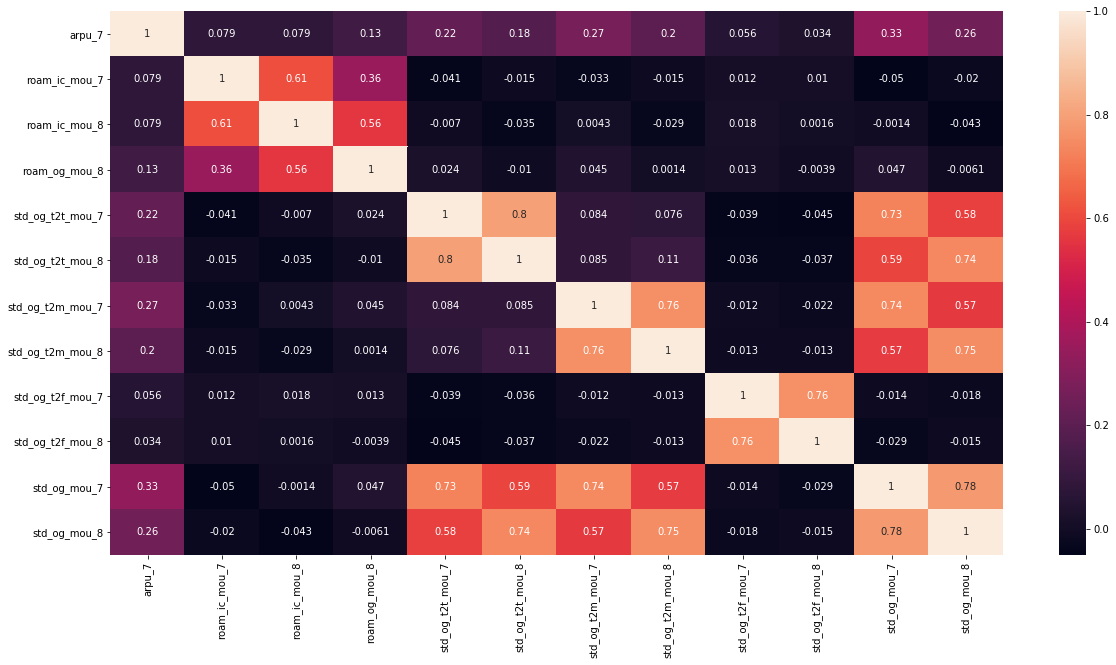

In [25]:
# There are a lot of features with high p-value which indicroam_ic_mou_7ates multicollinearity is present in the data, lets plot correlation
# matrix for some of these variables
# Let's see the correlation matrix 
corr_vars = ['arpu_7','roam_ic_mou_7','roam_ic_mou_8','roam_og_mou_8'
            ,'std_og_t2t_mou_7','std_og_t2t_mou_8','std_og_t2m_mou_7','std_og_t2m_mou_8','std_og_t2f_mou_7','std_og_t2f_mou_8',
            'std_og_mou_7','std_og_mou_8']

plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(imputed_data[corr_vars].corr(),annot=True)
plt.plot()

We can see there are some highly correlated variables like std_og_t2t_mou_7 and std_og_t2t_mou_8,std_og_t2f_mou_7 and std_og_t2f_mou_8

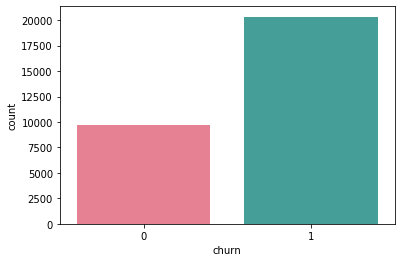

In [26]:
sns.countplot(x='churn', palette='husl', data=imputed_data)

-- We can see that there is data imbalance

## Outlier Detection

In [26]:
# Checking Outliers
numerics = ['float64','int64']
imputed_data_num = imputed_data.select_dtypes(include=numerics)
imputed_data_num.describe(percentiles=[.25,.5,.75,.90,.95,.99])


,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7,total_in_out_mou_6,total_in_out_mou_7,total_in_out_mou_8,total_data_usage_6,total_data_usage_7,total_data_usage_8,churn
count,3.001100e+04,30011.0,30011.0,30011.0,30011.0,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.0,30011.0,30011.0,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.0,30011.0,30011.0,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000
mean,7.001223e+09,109.0,0.0,0.0,0.0,587.284404,589.135427,534.857433,295

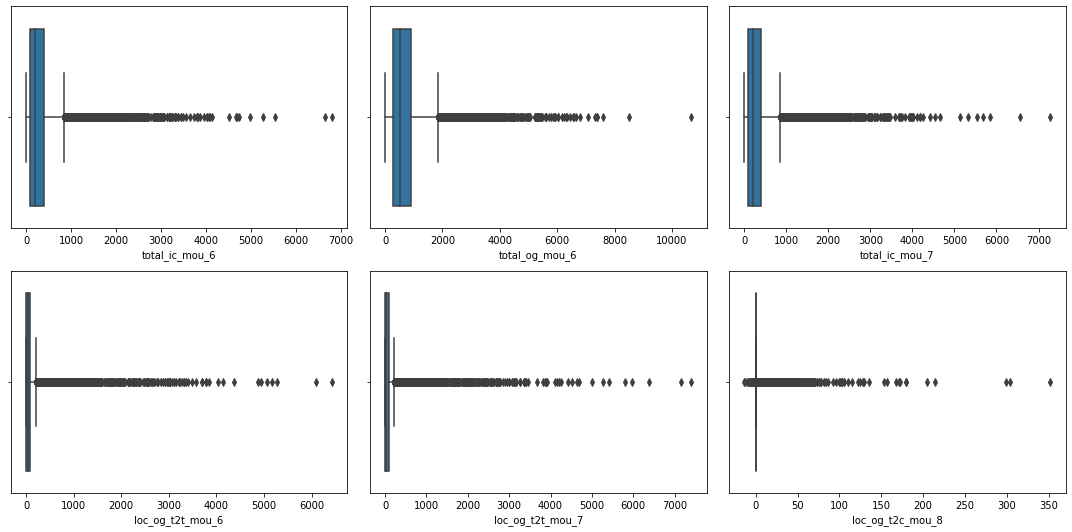

In [27]:
# Visualizing some columns using box plot that needs to be removed

fig, axs = plt.subplots(2,3, figsize = (15,7.5))
plt1 = sns.boxplot(imputed_data['total_ic_mou_6'], ax = axs[0,0])
plt2 = sns.boxplot(imputed_data['total_og_mou_6'], ax = axs[0,1])
plt3 = sns.boxplot(imputed_data['total_ic_mou_7'], ax = axs[0,2])
plt4 = sns.boxplot(imputed_data['loc_og_t2t_mou_6'], ax = axs[1,0])
plt5 = sns.boxplot(imputed_data['loc_og_t2t_mou_7'], ax = axs[1,1])
plt6 = sns.boxplot(imputed_data['loc_og_t2c_mou_8'], ax = axs[1,2])

plt.tight_layout()

In [28]:
# Though there are some outliers in the data but removing them will hamper the analysis as volume of data is pretty high
# drop the columns which are no longer needed
drop_cols = ['total_ic_mou_6','total_og_mou_6','total_ic_mou_7','total_og_mou_7','total_ic_mou_8','total_og_mou_8','vol_2g_mb_6'
            ,'vol_3g_mb_6','vol_2g_mb_7','vol_3g_mb_7','vol_2g_mb_8','vol_3g_mb_8','onnet_mou_6','onnet_mou_7','onnet_mou_8',
            'offnet_mou_6','offnet_mou_7','offnet_mou_8','loc_og_t2t_mou_6','loc_og_t2t_mou_7','loc_og_t2t_mou_8','loc_og_t2m_mou_6'
            ,'loc_og_t2m_mou_7','loc_og_t2m_mou_8','loc_og_t2f_mou_6','loc_og_t2f_mou_7','loc_og_t2f_mou_8','loc_og_t2c_mou_6',
            'loc_og_t2c_mou_7','loc_og_t2c_mou_8','loc_og_mou_6','loc_og_mou_7','loc_og_mou_8']
imputed_data.drop(columns=drop_cols,axis=1,inplace=True)
imputed_data.shape

(30011, 111)

### Undersampling Data because of Dataset imbalance

In [29]:
# Before undersamppling 
imputed_data["churn"].value_counts()

1    20343
0     9668
Name: churn, dtype: int64

In [30]:
# Undersamppling
positions = {0: 1, 1:0.5}
total = len(imputed_data)
sample_df = pd.concat([imputed_data[imputed_data['churn'] == k].sample(frac=v, replace=False) for k, v in positions.items()])
sample_df['churn'].value_counts()

1    10172
0     9668
Name: churn, dtype: int64

### Splitting Data into Training and Test Sets

In [31]:
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = sample_df.drop(['churn'],axis=1) # dropping ID column and predictpr column

# Putting response variable to y
y = sample_df['churn'] # The predictor column

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

In [32]:
# Scaling the dataset
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


### Logistic Regression (Without PCA)


In [34]:
#Importing necessary libraries required by all the models
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics
%matplotlib inline

In [35]:
from sklearn.linear_model import LogisticRegression
logClassifier = LogisticRegression()
logClassifier.fit(X_train, y_train)

#predicting the test data
Y_pred1 = logClassifier.predict(X_test)

#Evaluation methods
#Confusion Metrix
conf_matx = confusion_matrix(y_test, Y_pred1)
print(conf_matx)
print(classification_report(y_test, Y_pred1))
#Accuracy Score
print('Accuracy of Logistic Regression on Train set: {:.2f}'.format(logClassifier.score(X_train, y_train)))
print('Accuracy of Logistic Regression on Test set: {:.2f}'.format(logClassifier.score(X_test, y_test)))



#calculating sensitivity and specificity
TP = conf_matx[1, 1]
TN = conf_matx[0, 0]
FP = conf_matx[0, 1]
FN = conf_matx[1, 0]

sensitivity = TP / float(FN + TP)
specificity = TN / (TN + FP)
print('Sensitivity of Logistic Regression: {:.5f}'.format(sensitivity))
print('Specificity of Logistic Regression: {:.5f}'.format(specificity))
print('False Positive Rate of Logistic Regression: {:.5f}'.format(1-specificity))
print('Positive Liklihood Ratio of Logistic Regression: {:.5f}'.format(sensitivity/ 1-specificity))
print('Negative Liklihood Ratio of Logistic Regression: {:.5f}'.format(1-specificity/sensitivity))
print('Positive Pedictive Value of Logistic Regression: {:.5f}'.format(TP/(TP+FP)))
print('Negative Pedictive Value of Logistic Regression: {:.5f}'.format(TN/(TN+FN)))

#predicted probabilities
Y_pred_prob = logClassifier.predict_proba(X_test)[:, 1]

[[2354  626]
 [ 346 2626]]
              precision    recall  f1-score   support

           0       0.87      0.79      0.83      2980
           1       0.81      0.88      0.84      2972

    accuracy                           0.84      5952
   macro avg       0.84      0.84      0.84      5952
weighted avg       0.84      0.84      0.84      5952

Accuracy of Logistic Regression on Train set: 0.83
Accuracy of Logistic Regression on Test set: 0.84
Sensitivity of Logistic Regression: 0.88358
Specificity of Logistic Regression: 0.78993
False Positive Rate of Logistic Regression: 0.21007
Positive Liklihood Ratio of Logistic Regression: 0.09365
Negative Liklihood Ratio of Logistic Regression: 0.10599
Positive Pedictive Value of Logistic Regression: 0.80750
Negative Pedictive Value of Logistic Regression: 0.87185


Gini Coefficient of Logistic Regression: 0.80980


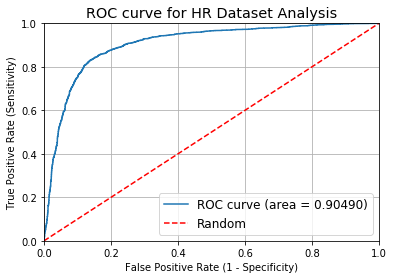

In [36]:
#ROC Curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, Y_pred_prob)
#calculating Area Under the Curve
roc_auc = metrics.auc(fpr, tpr)
#calculating gini coefficient
gini_coef = (2*roc_auc) -1
print('Gini Coefficient of Logistic Regression: {:.5f}'.format(gini_coef))
plt.plot(fpr, tpr, label='ROC curve (area = %0.5f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for HR Dataset Analysis')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc="lower right")
plt.grid(True)


### Applying PCA

In [37]:
# Importing the PCA module
from sklearn.decomposition import PCA

pca = PCA(svd_solver="randomized", random_state=42)
# IMplementing PCA to the dataset

pca.fit(imputed_data)


PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='randomized', tol=0.0, whiten=False)

In [38]:
pca.components_

array([[-9.99999890e-01,  0.00000000e+00,  0.00000000e+00, ...,
         9.69215281e-06,  4.23174082e-06,  1.16774130e-08],
       [ 4.55683871e-05,  5.55111512e-17,  1.11022302e-16, ...,
        -1.10717162e-01, -9.46991232e-02,  3.72265560e-05],
       [-6.05177053e-06, -1.90819582e-17, -6.93889390e-17, ...,
         5.09396796e-01,  5.01901885e-01, -1.25423407e-04],
       ...,
       [ 0.00000000e+00, -9.25876850e-03, -7.93942349e-02, ...,
         6.93889390e-18, -2.08166817e-17, -3.99636921e-16],
       [-0.00000000e+00, -9.89090938e-02,  7.72851917e-02, ...,
         2.77555756e-17,  2.77555756e-17,  5.22585447e-16],
       [-0.00000000e+00,  9.53022586e-01, -9.35614744e-03, ...,
         1.97845212e-15, -1.05471187e-15,  4.40151388e-14]])

Text(0, 0.5, 'Cumulative Variance')

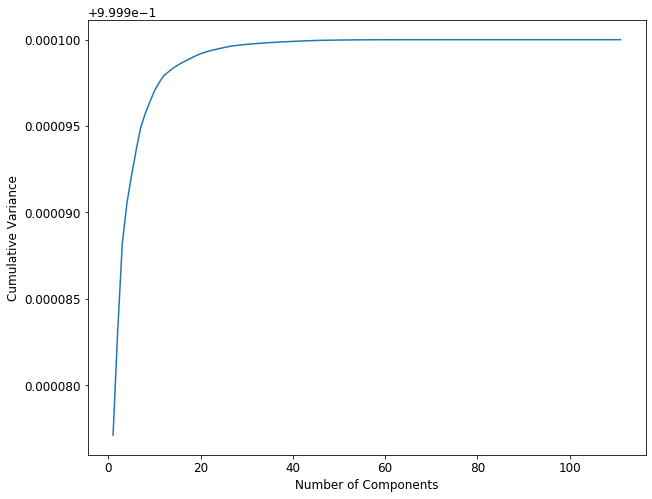

In [39]:
# Ploting the Scree Plot
fig = plt.figure(figsize=(10,8))
plt.plot(list(range(1,112)), np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Variance")
# plt.savefig("scree_plot.png")

### Run the PCA with the components chosed above

In [40]:
from sklearn.decomposition import PCA

pca = PCA(n_components=20)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

X_train_pca = pd.DataFrame(X_train_pca)
X_test_pca = pd.DataFrame(X_test_pca)
X_train_pca.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.538880,-0.391619,3.131134,-0.312346,-0.914250,-0.752100,-0.674582,-0.277275,0.078245,0.550627,0.004986,0.612306,-0.893580,-0.517017,0.395656,-0.410334,1.711233,0.428007,-0.296800,0.481452
1,-1.918576,-0.634498,-2.317926,-1.755268,4.938666,0.508019,0.375241,-0.591709,0.185554,-0.570637,-0.219079,-1.349720,0.879912,0.590711,0.096585,-0.090771,0.111016,-0.204411,-0.634589,-0.228618
2,-2.420040,-0.361892,-0.317868,-0.390901,0.634821,0.477589,0.210691,0.036624,-0.572496,0.641720,0.143815,0.534746,-0.249777,-0.347337,-0.261697,0.298662,-0.032972,0.180582,-0.740622,-0.436620
3,2.742094,-4.643795,3.233426,-1.221727,-0.746002,-1.157077,-0.131137,-0.390148,-0.105781,-1.106305,-0.253591,1.046241,2.088466,-1.112987,-2.075760,0.734839,-1.008660,0.831130,0.524977,0.504926
4,1.496789,-5.205033,-5.089988,-1.253966,3.610435,-2.034143,-0.005969,-0.165395,0.553555,0.453017,0.091475,-1.356875,-0.069984,-0.330905,0.132060,0.412830,-0.408837,0.349499,0.860402,0.185962


## Model Building and Evaluation

### Logistic Regression

In [41]:
from sklearn.linear_model import LogisticRegression
logClassifier = LogisticRegression()
logClassifier.fit(X_train_pca, y_train)

#predicting the test data
Y_pred1 = logClassifier.predict(X_test_pca)

#Evaluation methods
#Confusion Metrix
conf_matx = confusion_matrix(y_test, Y_pred1)
print(conf_matx)
print(classification_report(y_test, Y_pred1))
#Accuracy Score
print('Accuracy of Logistic Regression on Train set: {:.2f}'.format(logClassifier.score(X_train_pca, y_train)))
print('Accuracy of Logistic Regression on Test set: {:.2f}'.format(logClassifier.score(X_test_pca, y_test)))


#calculating sensitivity and specificity
TP = conf_matx[1, 1]
TN = conf_matx[0, 0]
FP = conf_matx[0, 1]
FN = conf_matx[1, 0]

sensitivity = TP / float(FN + TP)
specificity = TN / (TN + FP)
print('Sensitivity of Logistic Regression: {:.5f}'.format(sensitivity))
print('Specificity of Logistic Regression: {:.5f}'.format(specificity))
print('False Positive Rate of Logistic Regression: {:.5f}'.format(1-specificity))
print('Positive Liklihood Ratio of Logistic Regression: {:.5f}'.format(sensitivity/ 1-specificity))
print('Negative Liklihood Ratio of Logistic Regression: {:.5f}'.format(1-specificity/sensitivity))
print('Positive Pedictive Value of Logistic Regression: {:.5f}'.format(TP/(TP+FP)))
print('Negative Pedictive Value of Logistic Regression: {:.5f}'.format(TN/(TN+FN)))

#predicted probabilities
Y_pred_prob = logClassifier.predict_proba(X_test_pca)[:, 1]

[[2261  719]
 [ 356 2616]]
              precision    recall  f1-score   support

           0       0.86      0.76      0.81      2980
           1       0.78      0.88      0.83      2972

    accuracy                           0.82      5952
   macro avg       0.82      0.82      0.82      5952
weighted avg       0.82      0.82      0.82      5952

Accuracy of Logistic Regression on Train set: 0.81
Accuracy of Logistic Regression on Test set: 0.82
Sensitivity of Logistic Regression: 0.88022
Specificity of Logistic Regression: 0.75872
False Positive Rate of Logistic Regression: 0.24128
Positive Liklihood Ratio of Logistic Regression: 0.12149
Negative Liklihood Ratio of Logistic Regression: 0.13802
Positive Pedictive Value of Logistic Regression: 0.78441
Negative Pedictive Value of Logistic Regression: 0.86397


Gini Coefficient of Logistic Regression: 0.78077


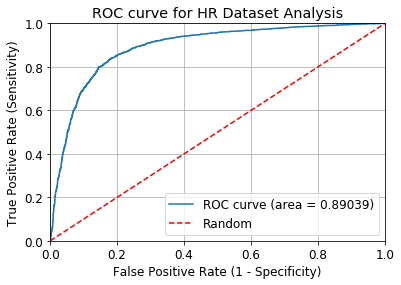

In [42]:
#ROC Curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, Y_pred_prob)
#calculating Area Under the Curve
roc_auc = metrics.auc(fpr, tpr)
#calculating gini coefficient
gini_coef = (2*roc_auc) -1
print('Gini Coefficient of Logistic Regression: {:.5f}'.format(gini_coef))
plt.plot(fpr, tpr, label='ROC curve (area = %0.5f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for HR Dataset Analysis')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc="lower right")
plt.grid(True)


### Decission Tree Classifier

In [43]:
#2). DecissionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
decTree = DecisionTreeClassifier()
decTree.fit(X_train, y_train)

#predicting the test data
Y_pred2 = decTree.predict(X_test)
#Evaluation methods
#Confusion Metrix
conf_matx = confusion_matrix(y_test, Y_pred2)
print(conf_matx)
print(classification_report(y_test, Y_pred2))
#Accuracy Score
print('Accuracy of Decision Tree Classifier on Train set: {:.2f}'.format(decTree.score(X_train, y_train)))
print('Accuracy of Decision Tree Classifier on Test set: {:.2f}'.format(decTree.score(X_test, y_test)))

#calculating sensitivity and specificity
TP = conf_matx[1, 1]
TN = conf_matx[0, 0]
FP = conf_matx[0, 1]
FN = conf_matx[1, 0]

print(X_train)

sensitivity = TP / float(FN + TP)
specificity = TN / (TN + FP)
print('Sensitivity of Decision Tree Classifier: {:.5f}'.format(sensitivity))
print('Specificity of Decision Tree Classifier: {:.5f}'.format(specificity))
print('False Positive Rate of Decision Tree Classifier: {:.5f}'.format(1-specificity))
print('Positive Liklihood Ratio of Decision Tree Classifier: {:.5f}'.format(sensitivity/ 1-specificity))
print('Negative Liklihood Ratio of Decision Tree Classifier: {:.5f}'.format(1-specificity/sensitivity))
print('Positive Pedictive Value of Decision Tree Classifier: {:.5f}'.format(TP/(TP+FP)))
print('Negative Pedictive Value of Decision Tree Classifier: {:.5f}'.format(TN/(TN+FN)))

#predicted probabilities
Y_pred_prob = decTree.predict_proba(X_test)[:, 1]

[[2304  676]
 [ 641 2331]]
              precision    recall  f1-score   support

           0       0.78      0.77      0.78      2980
           1       0.78      0.78      0.78      2972

    accuracy                           0.78      5952
   macro avg       0.78      0.78      0.78      5952
weighted avg       0.78      0.78      0.78      5952

Accuracy of Decision Tree Classifier on Train set: 1.00
Accuracy of Decision Tree Classifier on Test set: 0.78
[[ 0.69274104  0.          0.         ... -0.43474116 -0.4535835
  -0.44507381]
 [-1.50115133  0.          0.         ...  1.95821017  0.24785113
   0.23525276]
 [-0.90056819  0.          0.         ...  0.1915226   0.15236905
   0.27572806]
 ...
 [ 0.94073601  0.          0.         ... -0.12827565 -0.4535835
  -0.44507381]
 [-1.52561399  0.          0.         ... -0.43474116 -0.4535835
  -0.44507381]
 [ 0.32367256  0.          0.         ...  0.08059416  0.12848163
  -0.05672495]]
Sensitivity of Decision Tree Classifier: 0.784

Gini Coefficient of Decision Tree Classifier: 0.55747


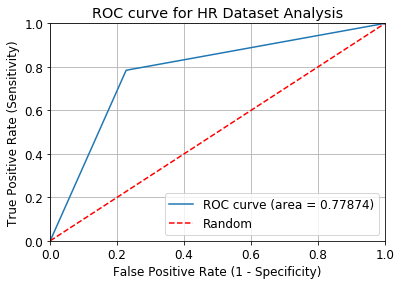

In [44]:
#ploting ROC Curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, Y_pred_prob)
#calculating Area Under the Curve
roc_auc = metrics.auc(fpr, tpr)
#calculating gini coefficient
gini_coef = (2*roc_auc) -1
print('Gini Coefficient of Decision Tree Classifier: {:.5f}'.format(gini_coef))
plt.plot(fpr, tpr, label='ROC curve (area = %0.5f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for HR Dataset Analysis')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc="lower right")
plt.grid(True)

### Random Forest Classifier

In [45]:
#3). RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
ranFor = RandomForestClassifier()
ranFor.fit(X_train, y_train)

#predicting the test data
Y_pred3 = ranFor.predict(X_test)
#Evaluation methods
#Confusion Metrix
conf_matx = confusion_matrix(y_test, Y_pred3)
print(conf_matx)
print(classification_report(y_test, Y_pred3))

#calculating sensitivity and specificity
TP = conf_matx[1, 1]
TN = conf_matx[0, 0]
FP = conf_matx[0, 1]
FN = conf_matx[1, 0]

print(X_train)

sensitivity = TP / float(FN + TP)
specificity = TN / (TN + FP)
print('Sensitivity of Random Forest: {:.5f}'.format(sensitivity))
print('Specificity of Random Forest: {:.5f}'.format(specificity))
print('False Positive Rate of Random Forest: {:.5f}'.format(1-specificity))
print('Positive Liklihood Ratio of Random Forest: {:.5f}'.format(sensitivity/ 1-specificity))
print('Negative Liklihood Ratio of Random Forest: {:.5f}'.format(1-specificity/sensitivity))
print('Positive Pedictive Value of Random Forest: {:.5f}'.format(TP/(TP+FP)))
print('Negative Pedictive Value of Random Forest: {:.5f}'.format(TN/(TN+FN)))

#predicted probabilities
Y_pred_prob = ranFor.predict_proba(X_test)[:, 1]

[[2604  376]
 [ 434 2538]]
              precision    recall  f1-score   support

           0       0.86      0.87      0.87      2980
           1       0.87      0.85      0.86      2972

    accuracy                           0.86      5952
   macro avg       0.86      0.86      0.86      5952
weighted avg       0.86      0.86      0.86      5952

[[ 0.69274104  0.          0.         ... -0.43474116 -0.4535835
  -0.44507381]
 [-1.50115133  0.          0.         ...  1.95821017  0.24785113
   0.23525276]
 [-0.90056819  0.          0.         ...  0.1915226   0.15236905
   0.27572806]
 ...
 [ 0.94073601  0.          0.         ... -0.12827565 -0.4535835
  -0.44507381]
 [-1.52561399  0.          0.         ... -0.43474116 -0.4535835
  -0.44507381]
 [ 0.32367256  0.          0.         ...  0.08059416  0.12848163
  -0.05672495]]
Sensitivity of Random Forest: 0.85397
Specificity of Random Forest: 0.87383
False Positive Rate of Random Forest: 0.12617
Positive Liklihood Ratio of Random 

Gini Coefficient of Random Forest: 0.84010


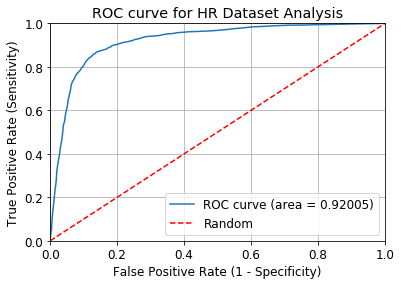

In [46]:
#ROC Curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, Y_pred_prob)
#calculating Area Under the Curve
roc_auc = metrics.auc(fpr, tpr)
#calculating gini coefficient
gini_coef = (2*roc_auc) -1
print('Gini Coefficient of Random Forest: {:.5f}'.format(gini_coef))
plt.plot(fpr, tpr, label='ROC curve (area = %0.5f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for HR Dataset Analysis')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc="lower right")
plt.grid(True)

### Naive Bayes

In [47]:
#5). Naive Bayes
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)
Y_pred5 = naive_bayes.predict(X_test)
#Evaluation methods
#Confusion Metrix
conf_matx = confusion_matrix(y_test, Y_pred5)
print(conf_matx)
print(classification_report(y_test, Y_pred5))
#Accuracy Score
print('Accuracy of Naive Bayes on Train set: {:.2f}'.format(naive_bayes.score(X_train, y_train)))
print('Accuracy of Naive Bayes on Test set: {:.2f}'.format(naive_bayes.score(X_test, y_test)))

#calculating sensitivity and specificity
TP = conf_matx[1, 1]
TN = conf_matx[0, 0]
FP = conf_matx[0, 1]
FN = conf_matx[1, 0]

sensitivity = TP / float(FN + TP)
specificity = TN / (TN + FP)
print('Sensitivity of Naive Bayes: {:.5f}'.format(sensitivity))
print('Specificity of Naive Bayes: {:.5f}'.format(specificity))
print('False Positive Rate of Naive Bayes(1-Specificity): {:.5f}'.format(1-specificity))
print('Positive Liklihood Ratio of Naive Bayes: {:.5f}'.format(sensitivity/ 1-specificity))
print('Negative Liklihood Ratio of Naive Bayes: {:.5f}'.format(1-specificity/sensitivity))
print('Positive Pedictive Value of Naive Bayes: {:.5f}'.format(TP/(TP+FP)))
print('Negative Pedictive Value of Naive Bayes: {:.5f}'.format(TN/(TN+FN)))

#predicted probabilities
Y_pred_prob = naive_bayes.predict_proba(X_test)[:, 1]

[[1999  981]
 [ 312 2660]]
              precision    recall  f1-score   support

           0       0.86      0.67      0.76      2980
           1       0.73      0.90      0.80      2972

    accuracy                           0.78      5952
   macro avg       0.80      0.78      0.78      5952
weighted avg       0.80      0.78      0.78      5952

Accuracy of Naive Bayes on Train set: 0.78
Accuracy of Naive Bayes on Test set: 0.78
Sensitivity of Naive Bayes: 0.89502
Specificity of Naive Bayes: 0.67081
False Positive Rate of Naive Bayes(1-Specificity): 0.32919
Positive Liklihood Ratio of Naive Bayes: 0.22421
Negative Liklihood Ratio of Naive Bayes: 0.25051
Positive Pedictive Value of Naive Bayes: 0.73057
Negative Pedictive Value of Naive Bayes: 0.86499


Gini Coefficient of Naive Bayes: 0.70758


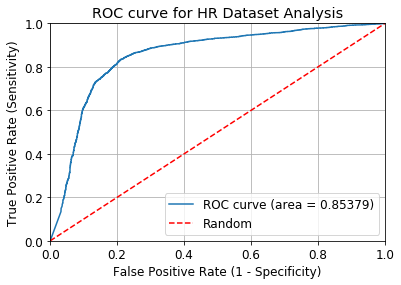

In [48]:
#ROC Curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, Y_pred_prob)
#calculating Area Under the Curve
roc_auc = metrics.auc(fpr, tpr)
#calculating gini coefficient
gini_coef = (2*roc_auc) -1
print('Gini Coefficient of Naive Bayes: {:.5f}'.format(gini_coef))
plt.plot(fpr, tpr, label='ROC curve (area = %0.5f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for HR Dataset Analysis')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc="lower right")
plt.grid(True)

## Conclusion and Recommendations

We have build different models for interpretability and good predictions. We can conclude by saying that Random forrest classfier gives the best result in terms of accuracy. We applied PCA on the dataset to determine the ideal number of components 
for building the logistic regression models and as per the screen plot it turned out to be 20. If we compare the ROC curve for each of the models we built, Random forest has the best results as it has the highest value of AUC i.e 0.92.

We would strictly recommend to use Random forest Classifier for this use case.

'C:\\Users\\91963'